Importing Libraries

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

Importing File

In [237]:
file = r'/Users/rickyansong/Library/Mobile Documents/com~apple~CloudDocs/Data Science/Project Files/Copy of sonar data.csv'

Creating DataFrame

In [238]:
sonar_df = pd.read_csv(file,header=None)

Assessing the DataFrames Characteristics

In [239]:
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [240]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [241]:
sonar_df.shape

(208, 61)

In [242]:
sonar_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [243]:
# class distribution ( M = mine, R = rock)
sonar_df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

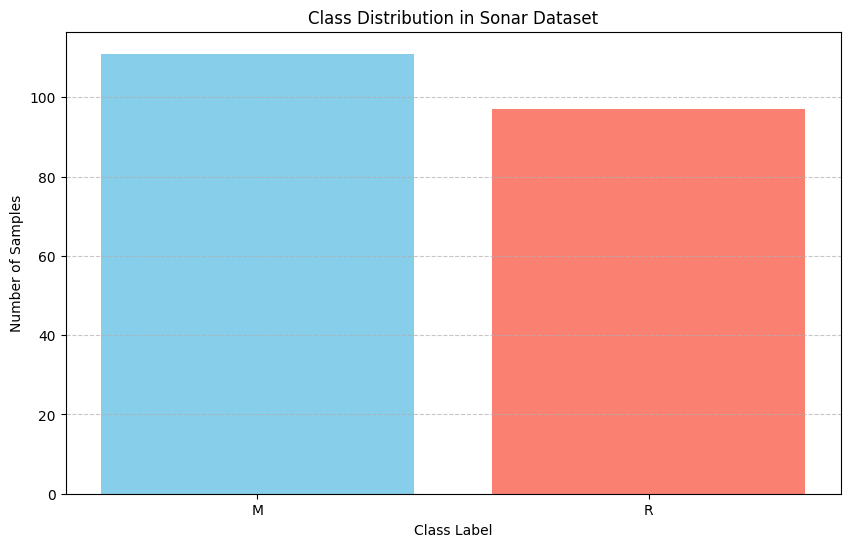

In [244]:
plt.figure(figsize=(10, 6))
class_counts = sonar_df[60].value_counts()

plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])
plt.title('Class Distribution in Sonar Dataset')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on the distribution on of the classes, I have decided to stratify the target variable to ensure an equal distribution in the train test split

Defining features and target variable

In [245]:
# I did not use a standard scaler here because the features are not on different scales, they are all between 0 and 1. And I did not use a label encoder because because the target variable is already in a binary format (M and R).
x= sonar_df.drop(60, axis=1)
y = sonar_df[60]

Splitting Data into Test and Training Sets;reserving 20% of the data for testing; stratifying 'y' for a balanced split

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [247]:
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(208, 60) (166, 60) (42, 60)
(208,) (166,) (42,)


Model Training

Training a model using Logistic Regression

In [248]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Evaluating the Logistic Regression's Model on the Training Data v Test Data

In [249]:
y_train_pred = model.predict(x_train)
train_accuracy_score = accuracy_score(y_train, y_train_pred)    
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [250]:
print("the train_accuracy_score is: ", train_accuracy_score)
print("the train_f1_score is: ", train_f1_score)

the train_accuracy_score is:  0.8433734939759037
the train_f1_score is:  0.8432132036919607


In [251]:
y_test_pred = model.predict(x_test)

In [252]:
test_accuracy_score = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

In [253]:
print("the test_accuracy_score is: ", test_accuracy_score)
print("the test_f1_score is: ", test_f1_score)

the test_accuracy_score is:  0.6904761904761905
the test_f1_score is:  0.6899494908570348


Evaluating the Logistic Regression model's fit on the trained data vrs the test data showed better performance on the training data in comparison to the test data implying a potential overfitting of the data.

Plotting a Confusion Matrix  of the predicted v actual outcomes

In [254]:
conf_m = confusion_matrix(y_test, y_test_pred, labels=model.classes_)

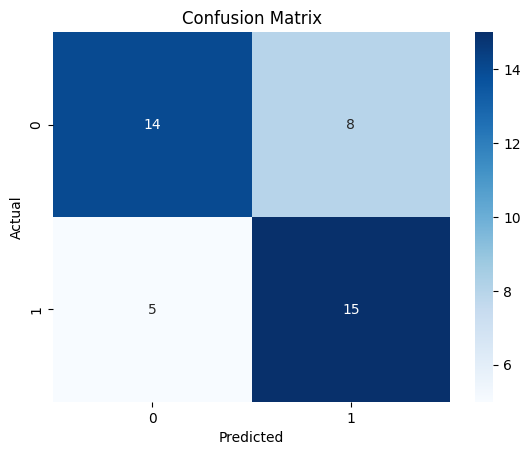

              precision    recall  f1-score   support

           M       0.74      0.64      0.68        22
           R       0.65      0.75      0.70        20

    accuracy                           0.69        42
   macro avg       0.69      0.69      0.69        42
weighted avg       0.70      0.69      0.69        42



In [255]:
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_test_pred))

In [256]:
# the f1 score is a good metric to use for this dataset because it is imbalanced. However, the f1 score for Mines is lower than Rocks which makes it not reliable in life/death situations.
# Let's try Support Vector Machine (SVM) and Decision Tree Classifier to see if we can improve the performance.

Building a model using Support Vector Machine SVM

In [257]:
svc = SVC(max_iter=1000)

#fitting the model
svc.fit(x_train, y_train)


SVC(max_iter=1000)

Evaluating the SVC Model on the Training Data v Test Data

In [258]:
y_train_pred_svc = svc.predict(x_train)
train_accuracy_score_svc = accuracy_score(y_train, y_train_pred_svc)
train_f1_score_svc = f1_score(y_train, y_train_pred_svc, average='weighted')
print("SVC train_accuracy_score: ", train_accuracy_score_svc)
print("SVC train_f1_score: ", train_f1_score_svc)

SVC train_accuracy_score:  0.8674698795180723
SVC train_f1_score:  0.8660551769717864


In [259]:
y_test_pred_svc = svc.predict(x_test)
test_accuracy_score_svc = accuracy_score(y_test, y_test_pred_svc)
test_f1_score_svc = f1_score(y_test, y_test_pred_svc, average='weighted')
print("SVC test_accuracy_score: ", test_accuracy_score_svc)
print("SVC test_f1_score: ", test_f1_score_svc)

SVC test_accuracy_score:  0.7380952380952381
SVC test_f1_score:  0.7376475376475375


Evaluating the SVC model's fit on the trained data vrs the test data showed better performance on the training data in comparison to the test data implying a pottential overfitting of the training data although the difference in training v testing is not as big as it was with the LR model.

### Plotting a Confusion Matrix  of the predicted v actual outcomes

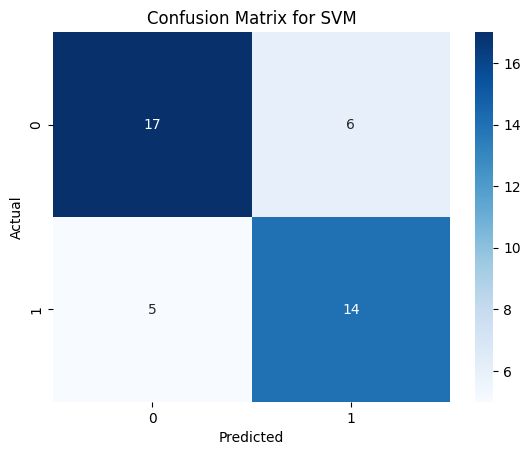

              precision    recall  f1-score   support

           M       0.74      0.77      0.76        22
           R       0.74      0.70      0.72        20

    accuracy                           0.74        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.74      0.74      0.74        42



In [260]:
conf_m_svc = confusion_matrix(y_test_pred_svc, y_test, labels=svc.classes_)
sns.heatmap(conf_m_svc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()
print(classification_report(y_test, y_test_pred_svc))

We see a better performance of the SVM in comparison to the LR model

Using a cross validation on the SVM focusing on F1 score

In [261]:
svc = SVC(max_iter=1000)

# Apply cross-validation on the entire dataset (x, y) using SVC
scores = cross_val_score(svc, x, y, cv=5, scoring='f1_weighted')

print("Cross-validation scores:", scores)
print("Mean f1_score:", scores.mean())

Cross-validation scores: [0.4957265  0.73764754 0.45331705 0.73010748 0.38877902]
Mean f1_score: 0.5611155179164254


In [262]:
# Apply cross-validation on the entire dataset (x, y) using the Logistic Regression model
scores = cross_val_score(model, x, y, cv=5, scoring='f1_weighted')

print("Cross-validation scores:", scores)
print("Mean f1_score:", scores.mean())

Cross-validation scores: [0.43226433 0.76081508 0.61904762 0.82639713 0.48841572]
Mean f1_score: 0.6253879776629012


It is interesting that in applying cross validation to the entire dataset, the LR model performs better than the SVM

Let us perform some hyper parameter tuning of the SVM

In [263]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(max_iter=1000)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)


Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxS

In [264]:
grid_best_model = grid.best_estimator_
y_test_pred_grid = grid_best_model.predict(x_test)
test_accuracy_score_grid = accuracy_score(y_test, y_test_pred_grid)
print("Test accuracy with best parameters:", test_accuracy_score_grid)
test_f1_score_grid = f1_score(y_test, y_test_pred_grid, average='weighted')
print("Test f1 score with best parameters:", test_f1_score_grid)



Test accuracy with best parameters: 0.8809523809523809
Test f1 score with best parameters: 0.8799255182233905


### Decision Tree Classifier Model

0.7380952380952381


<Axes: >

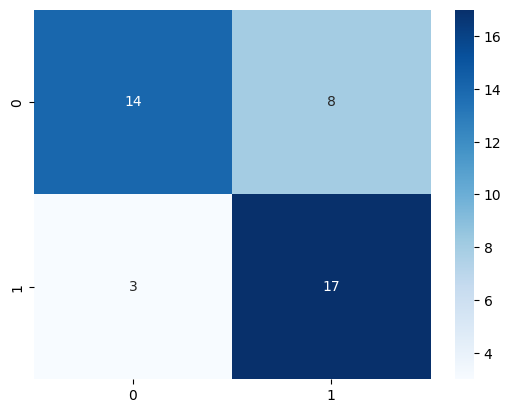

In [265]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_test_pred_tree = tree_model.predict(x_test)
test_accuracy_score_tree = accuracy_score(y_test, y_test_pred_tree)
print(test_accuracy_score_tree)
conf_m_tree = confusion_matrix(y_test, y_test_pred_tree)
sns.heatmap(conf_m_tree, annot=True, fmt='d', cmap='Blues')

In [266]:
cross_val_score_tree = cross_val_score(tree_model, x, y, cv=5, scoring='accuracy')
print("Cross-validation scores for Decision Tree:", cross_val_score_tree)
print("Mean accuracy for Decision Tree:", cross_val_score_tree.mean())

Cross-validation scores for Decision Tree: [0.52380952 0.61904762 0.5952381  0.82926829 0.68292683]
Mean accuracy for Decision Tree: 0.6500580720092916


The decision tree did not show better accuracy than the SVM, especially after using finding the best parameters for the former. Thus I am going to use the best parameters of the SVM.

Testing the Model

In [267]:
input_data = (0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,0.0904,0.0671,0.0997,0.1056,0.0346,0.1231,0.1626,0.3652,0.3262,0.2995,0.2109,0.2104,0.2085,0.2282,0.0747,0.1969,0.4086,0.6385,0.7970,0.7508,0.5517,0.2214,0.4672,0.4479,0.2297,0.3235,0.4480,0.5581,0.6520,0.5354,0.2478,0.2268,0.1788,0.0898,0.0536,0.0374,0.0990,0.0956,0.0317,0.0142,0.0076,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085)
input_data_reshaped = np.asanyarray(input_data).reshape(1, -1)
predicted_class = grid_best_model.predict(input_data_reshaped)
print("Predicted class for input data:", predicted_class[0])

Predicted class for input data: R
